# importing 

In [1]:
import warnings
#%load_ext cudf.pandas
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
# for Classifcation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, \
    precision_recall_fscore_support,precision_score,recall_score
# for Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,\
explained_variance_score, max_error, median_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
#from pycaret.regression import *
from pycaret.classification import *
#from pycaret.clustering import *
from skimpy import skim
from summarytools import dfSummary
import sweetviz as sv
import statsmodels.api as sm

# PassengerId: A unique identifier for each passenger.
# Survived: This is the target variable, with values 0 (indicating the passenger did not survive) or 1 (indicating the passenger survived).
# Pclass: The passenger's class (1st, 2nd, or 3rd class).
# Name: The passenger's name.
# Sex: The passenger's gender (male or female).
# Age: The passenger's age.
# SibSp: The number of siblings/spouses aboard.
# Parch: The number of parents/children aboard.
# Ticket: The ticket number.
# Fare: The fare paid for the ticket.
# Cabin: The cabin number.
# Embarked: The port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

# preprocessing and cleaning

In [2]:
df1=pd.read_csv(r"C:\Users\fady\Downloads\Task 1 Titanic Machine Learning from Disaster\train.csv")
df2=pd.read_csv(r"C:\Users\fady\Downloads\Task 1 Titanic Machine Learning from Disaster\test.csv")
df3=pd.read_csv(r"C:\Users\fady\Downloads\Task 1 Titanic Machine Learning from Disaster\gender_submission.csv")
print(df1.shape)
print(df2.shape)
print(df3.shape)



(891, 12)
(418, 11)
(418, 2)


In [3]:
skim(df1)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 891    │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA    ┃ NA %     ┃ mean    ┃ sd     ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ PassengerId      │     0 │        0 │     450 │    260 │      1 │   220 │   450 │   670 │    890 │ ▇▇▇▇▇▇  │  │
│ │ Survived         │     0 │        0 │    0.38 │   0.49 │      0 │     0 │     0 │     1 │      1 │ ▇    ▅  │  │
│ │ Pclass           │     0 │        0 │     2.3 │   0.84 │      1 │     2 │     3 │     3 │      3 │ ▃  ▃ ▇  │  │
│ │ Age              │   177 │    19.87 │      30 │     15 │   0.42 │    20 │    28 │    38 │     80 │  ▂▇▇▃▁  │  │
│ │ SibSp            │     0 │        0 │    0.52 │    1.1 │      0 │     0 │     0 │     1 │      8 │    ▇    │  │
│ │ Parch            │     0 │        0 │    0.38 │   0.81 │      0 │     0 │     0 │     0 │      6 │   ▇▁▁   │  │
│ │ Fare             │     0 │        0 │      32 │     50 │      0 │   7.9 │    14 │    31 │    510 │    ▇    │  │
│ └──────────────────┴───────┴──────────┴─────────┴────────┴────────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA       ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Name                     │        0 │          0 │                          4.1 │                     3626 │  │
│ │ Sex                      │        0 │          0 │                            1 │                      891 │  │
│ │ Ticket                   │        0 │          0 │                          1.3 │                     1130 │  │
│ │ Cabin                    │      687 │       77.1 │                         0.27 │                      238 │  │
│ │ Embarked                 │        2 │       0.22 │                            1 │                      889 │  │
│ └──────────────────────────┴──────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.07,NaN,C


In [6]:
df1.duplicated().sum()


0

In [7]:
df1.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.00,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN


In [8]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df1.isna().sum()/len(df1)*100

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           19.87
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin         77.10
Embarked       0.22
dtype: float64

In [10]:
df1.drop("Cabin",axis=1,inplace=True)

In [11]:
df1["Age"].fillna(df1["Age"].mean(),inplace=True)

In [12]:
df1["Embarked"].fillna(df1["Embarked"].mode()[0], inplace=True)

In [13]:
df1.isna().sum()/len(df1)*100

PassengerId   0.00
Survived      0.00
Pclass        0.00
Name          0.00
Sex           0.00
Age           0.00
SibSp         0.00
Parch         0.00
Ticket        0.00
Fare          0.00
Embarked      0.00
dtype: float64

# visualization

                                             |                                            | [  0%]   00:00 -> …


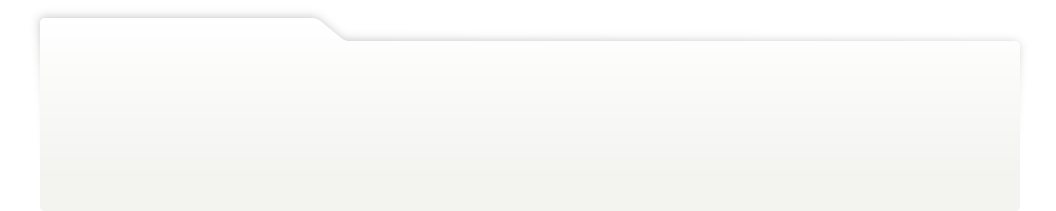
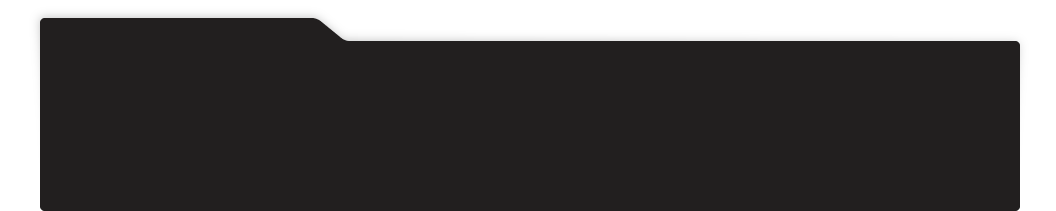
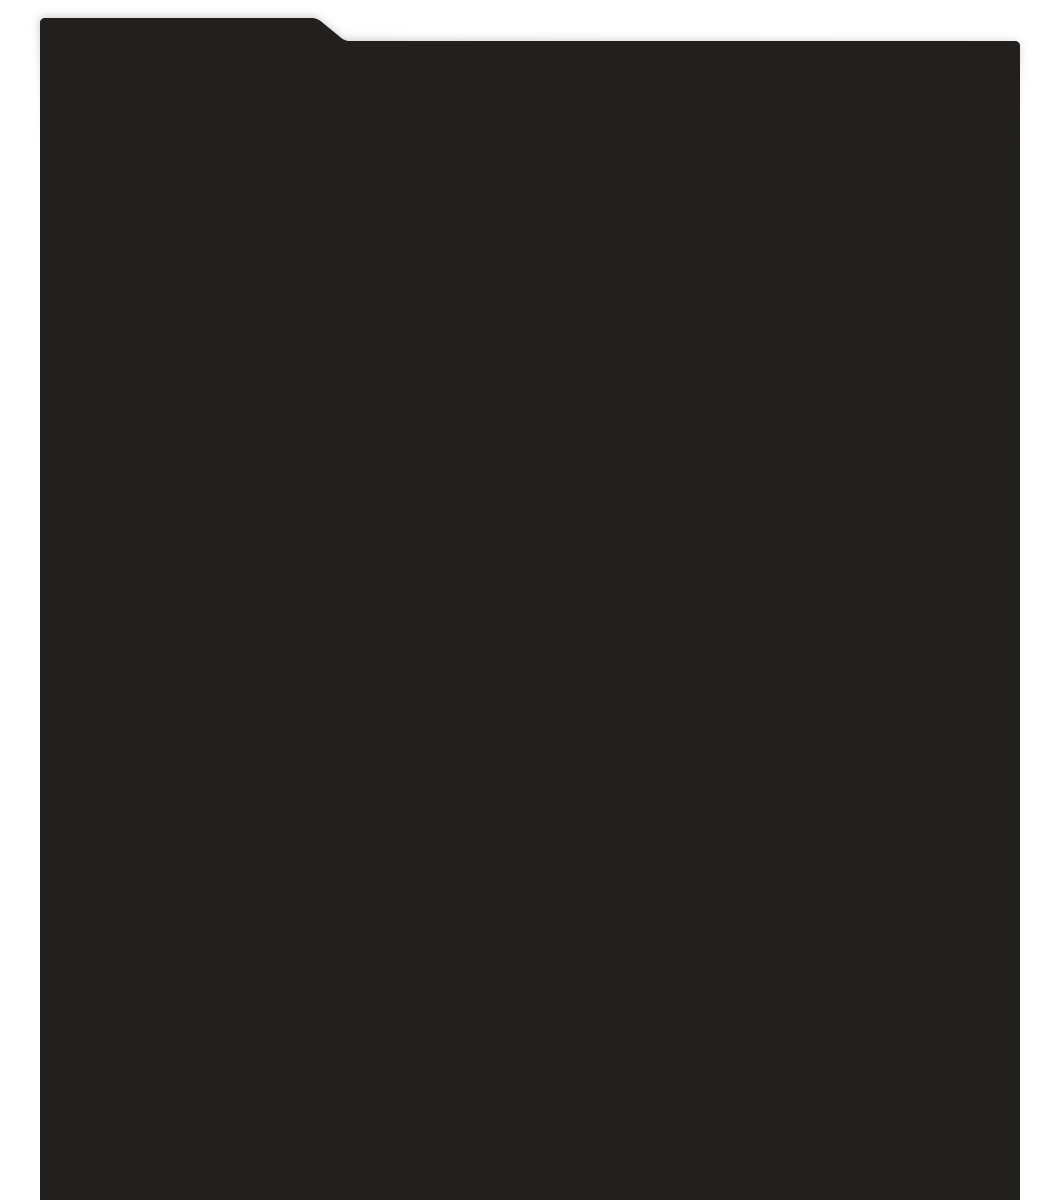
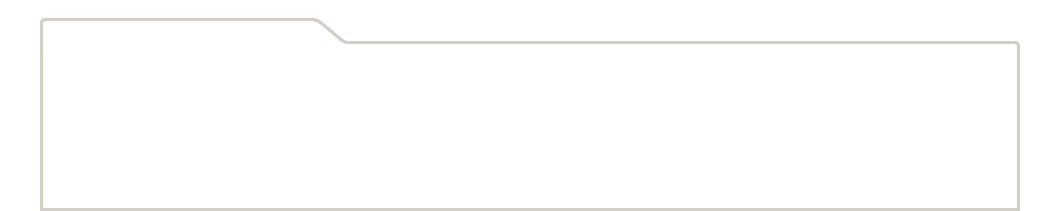
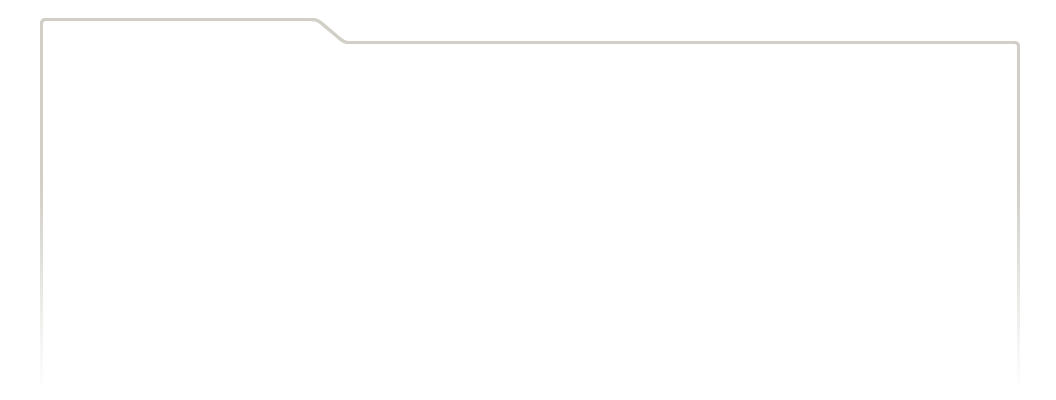
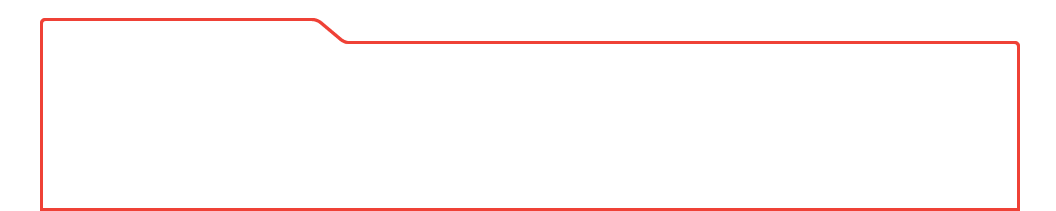
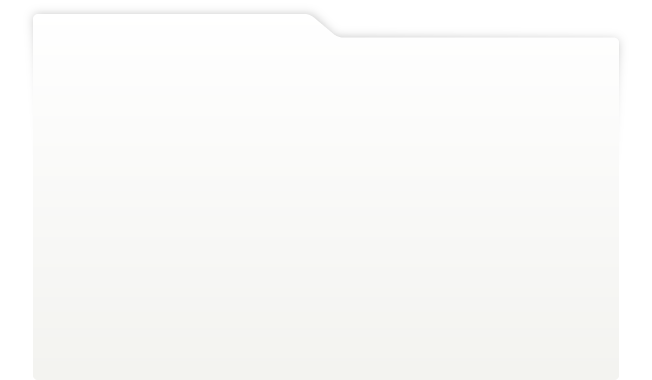
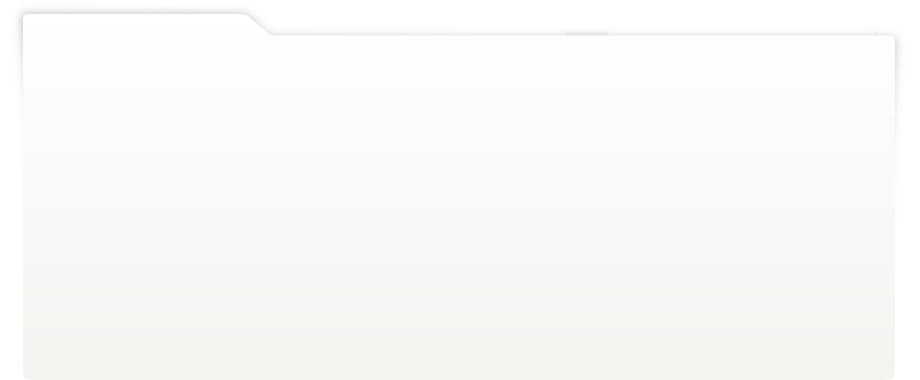
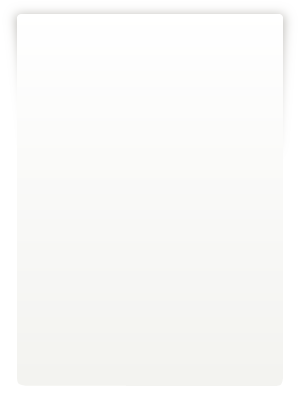
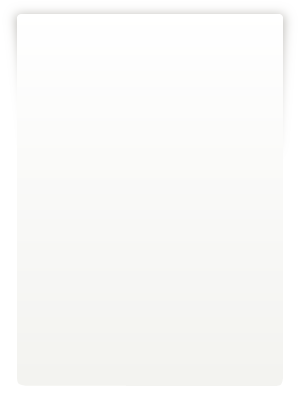
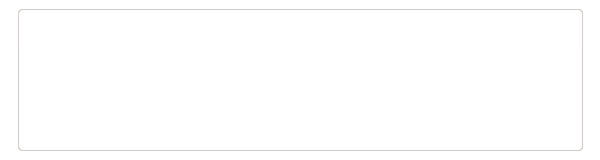
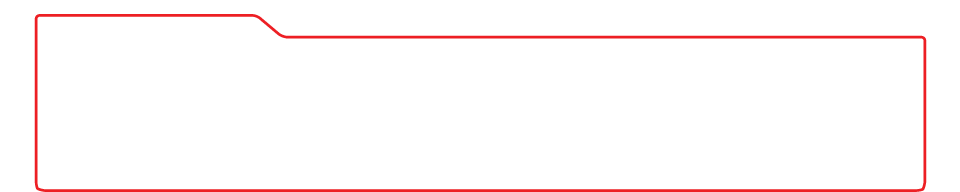
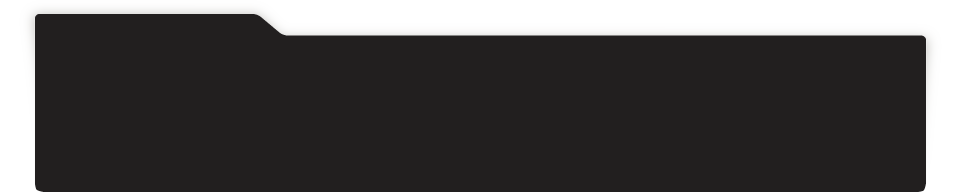
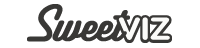
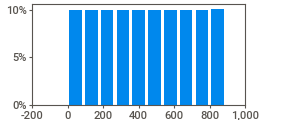
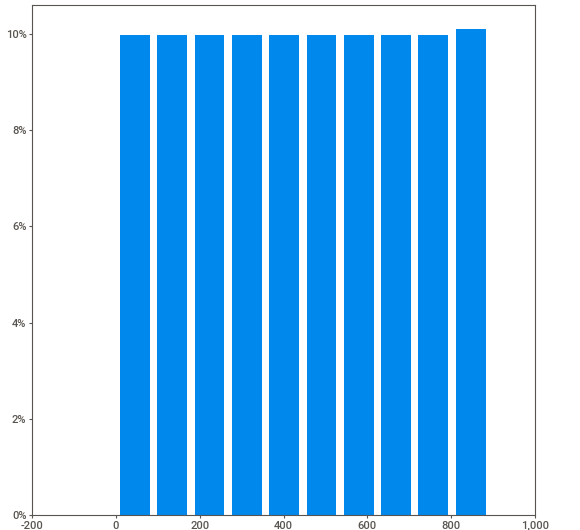
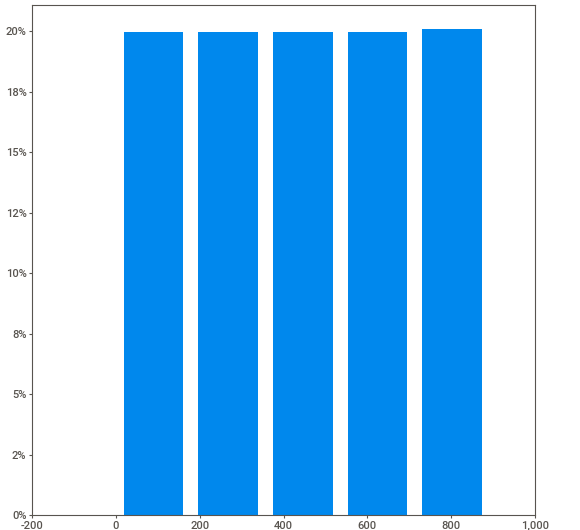
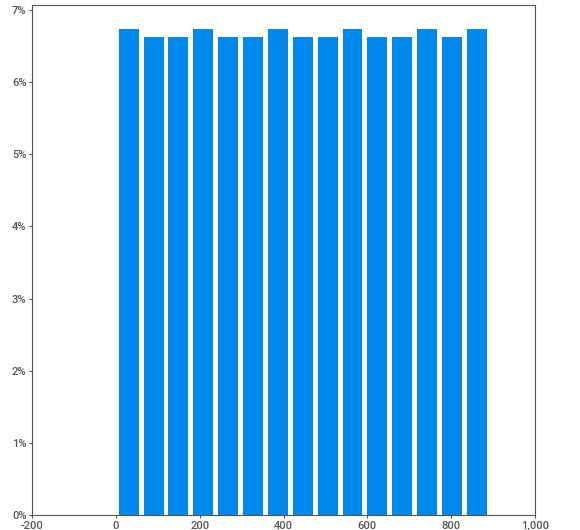
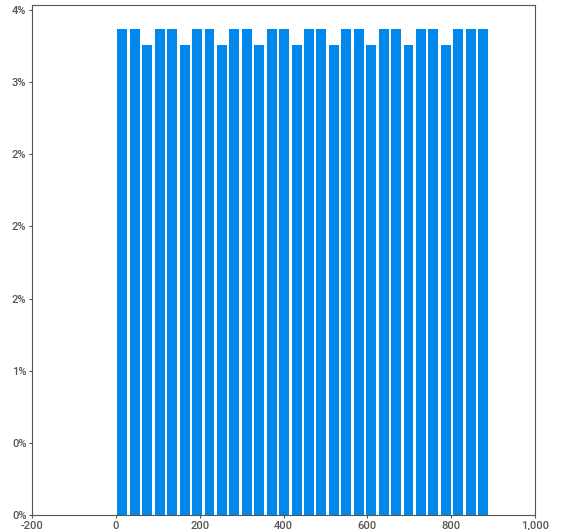
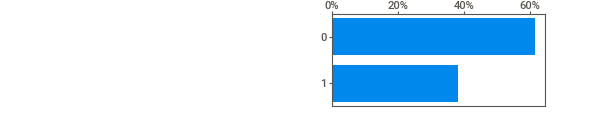
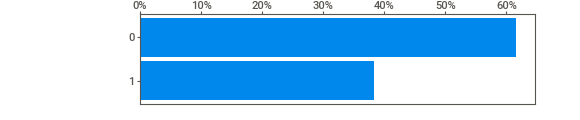
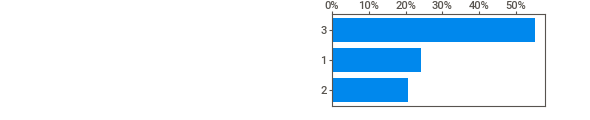
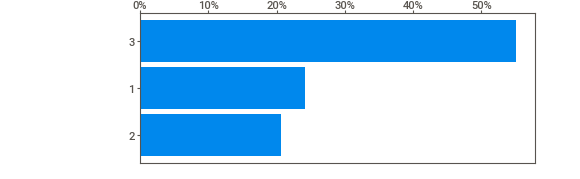
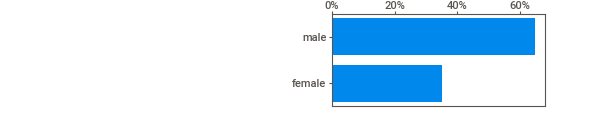
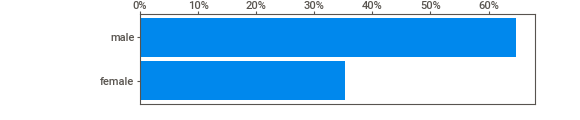
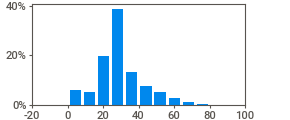
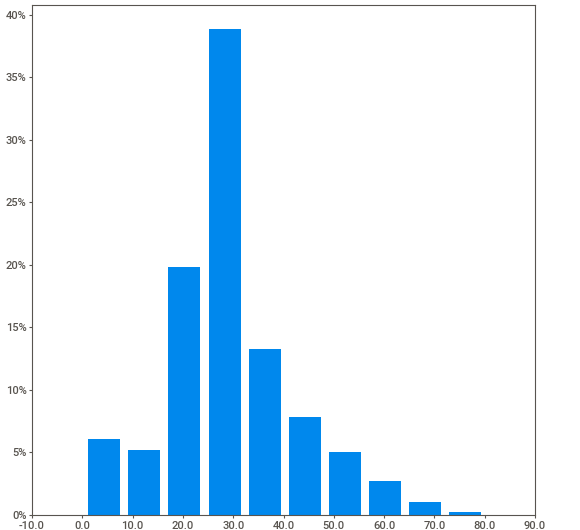
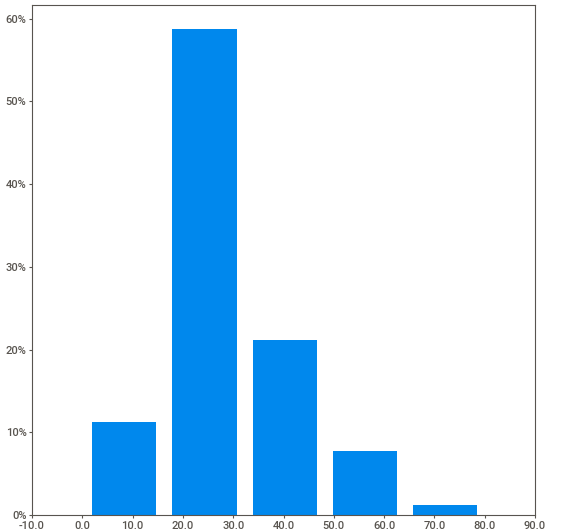
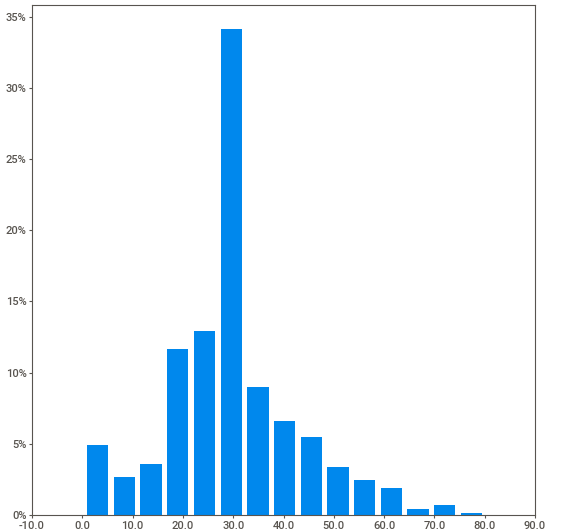
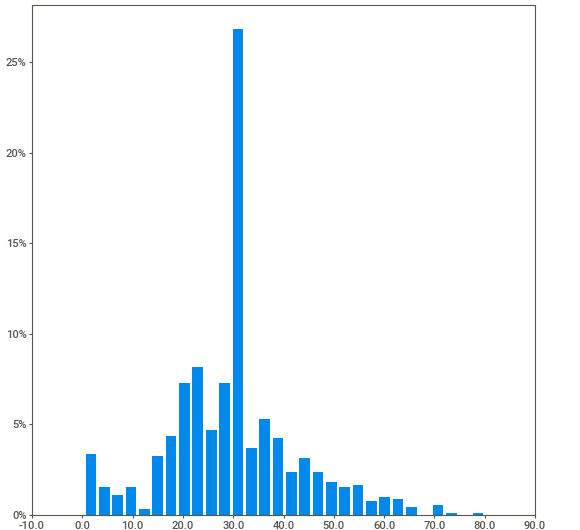
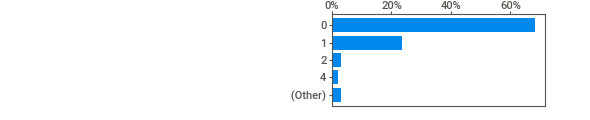
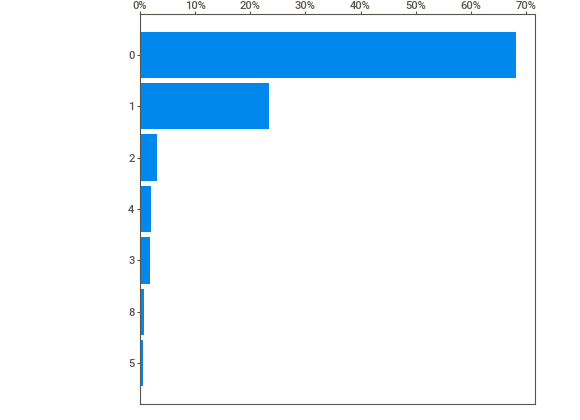
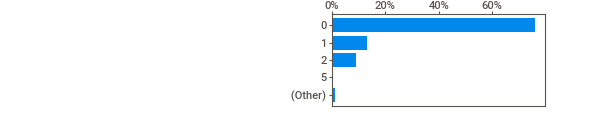
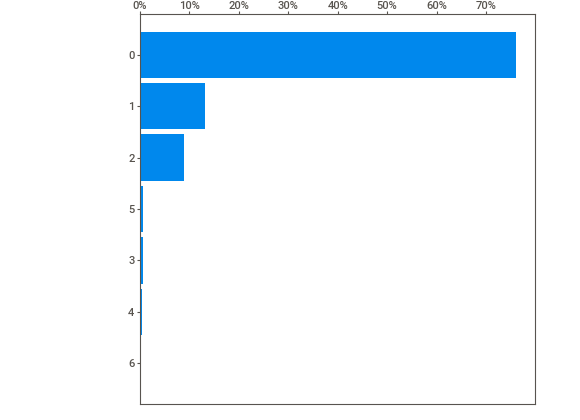
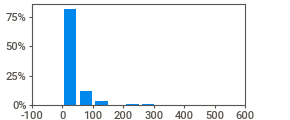
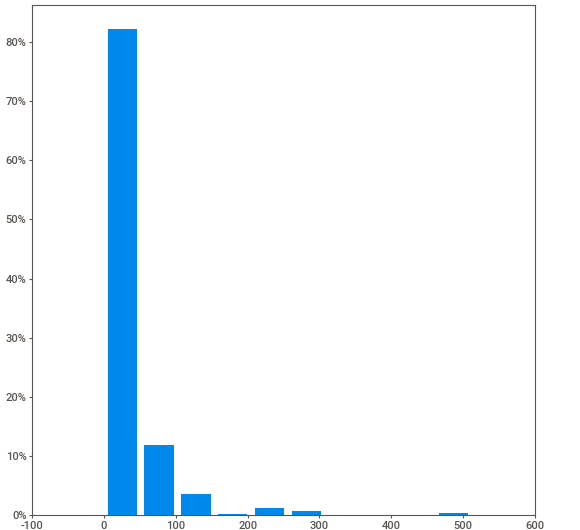
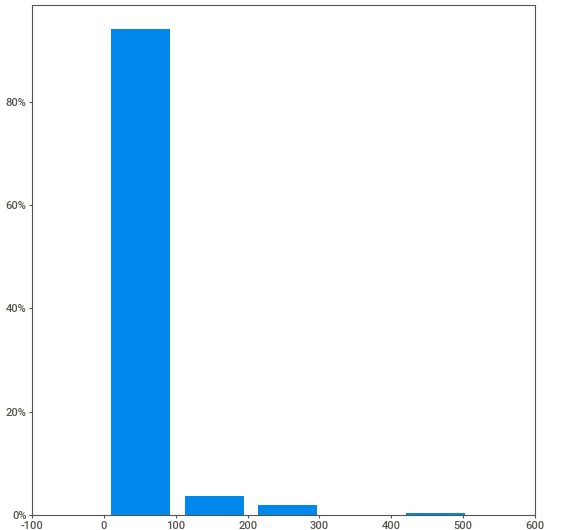
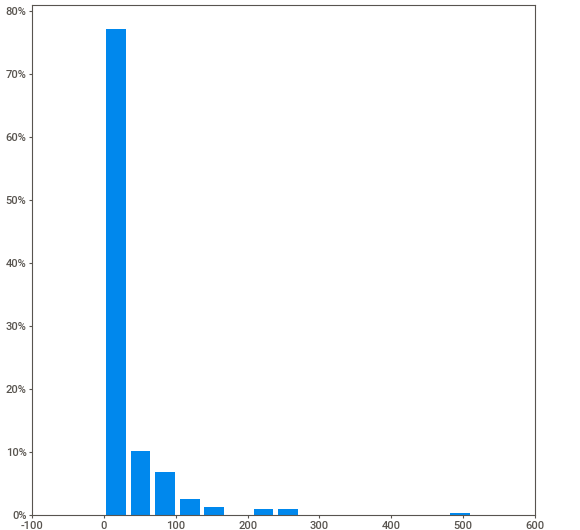
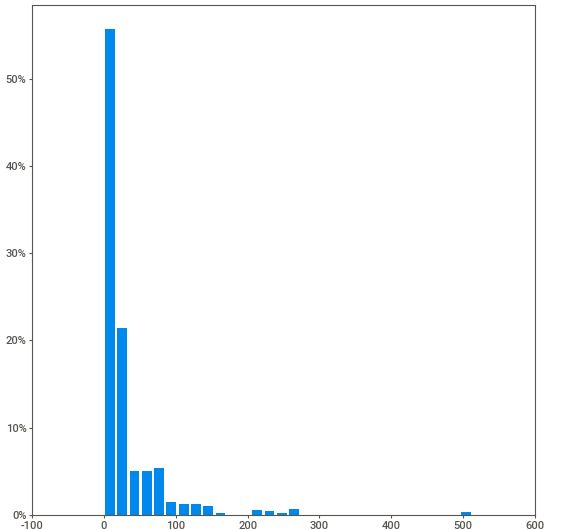
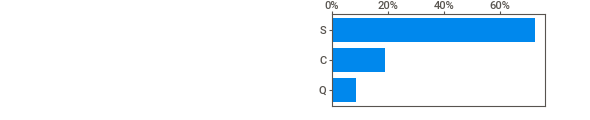
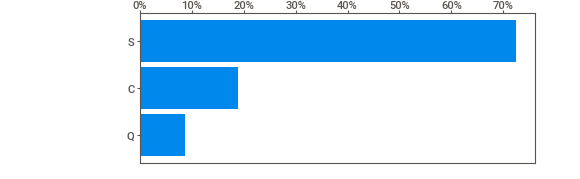
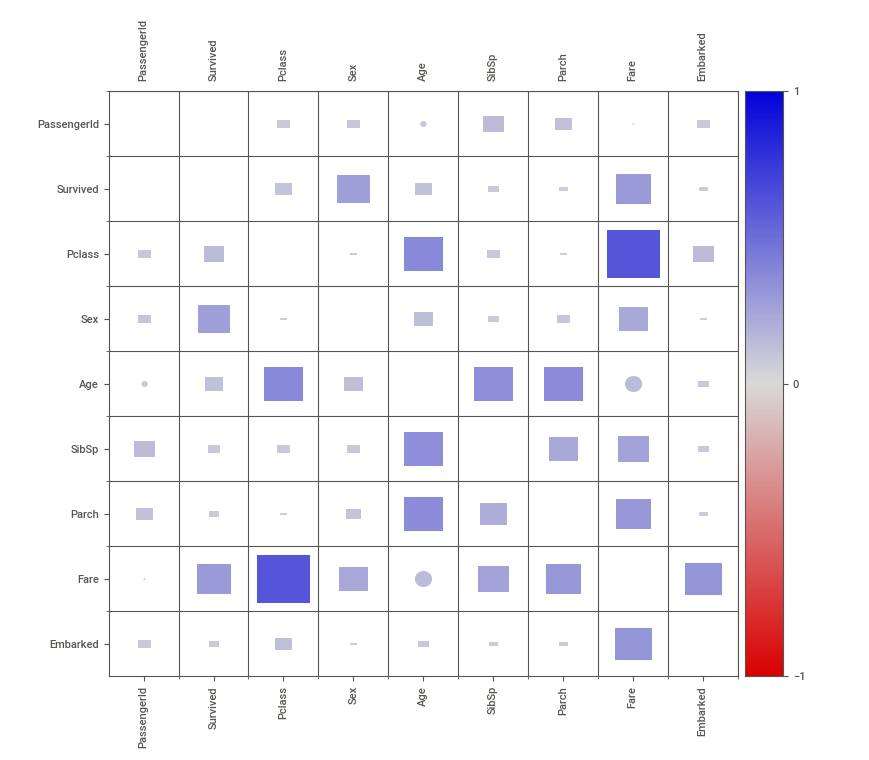
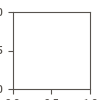

In [14]:
my_report = sv.analyze(df1)
my_report.show_notebook()

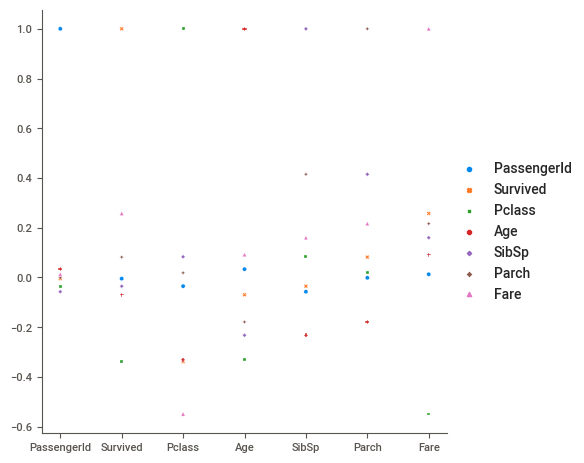

In [15]:
df1_numeric = df1.select_dtypes(include=['number'])
sns.relplot(data=df1_numeric.corr())


<AxesSubplot: >

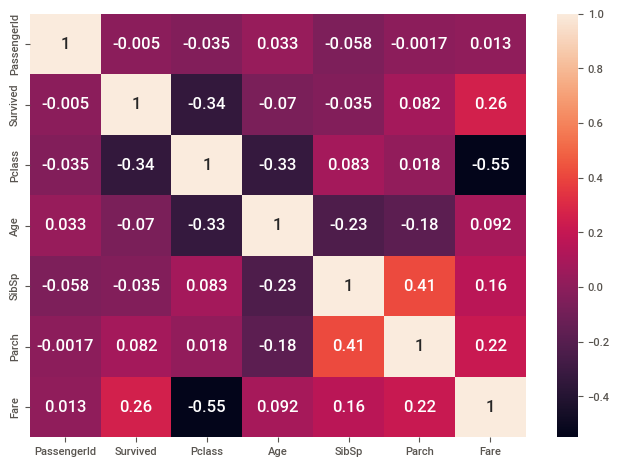

In [16]:
df1_numeric = df1.select_dtypes(include=['number'])
sns.heatmap(data=df1_numeric.corr(),annot=True)

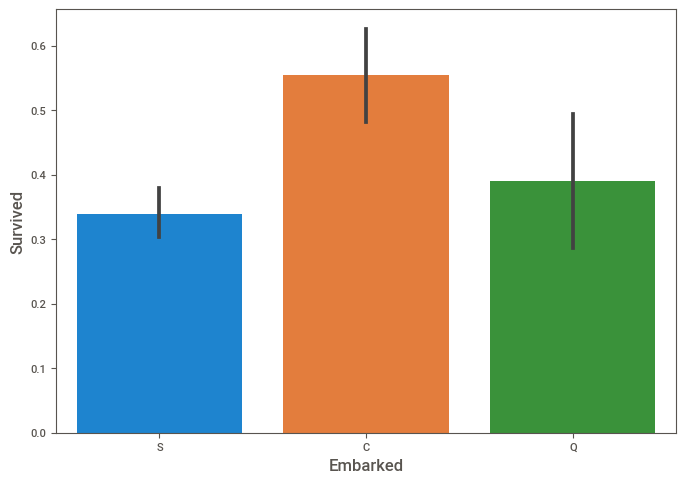

In [17]:
sns.barplot(data=df1,x="Embarked",y="Survived")
plt.show()

In [18]:
df1["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

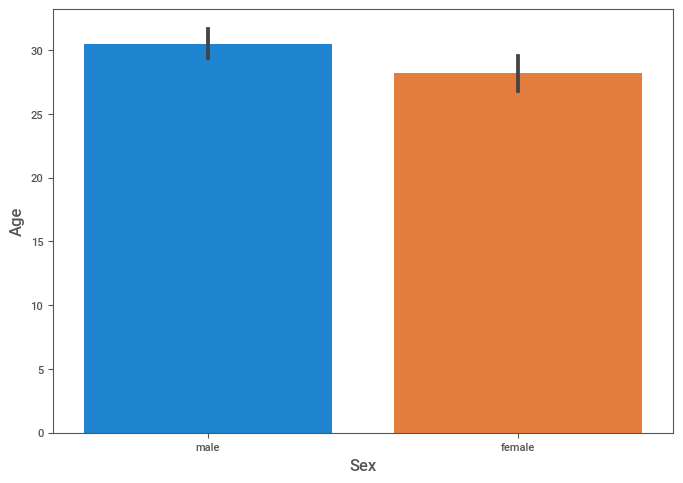

In [19]:
sns.barplot(data=df1,x="Sex",y="Age")
plt.show()

<AxesSubplot: xlabel='Sex', ylabel='count'>

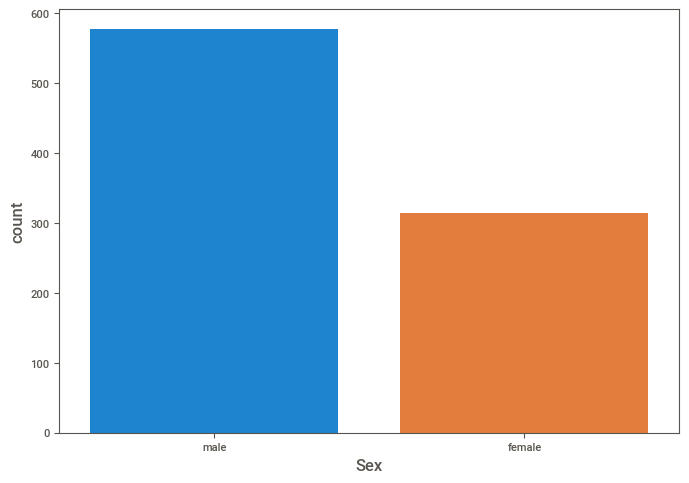

In [20]:
sns.countplot(data=df1, x="Sex")


<AxesSubplot: xlabel='Embarked', ylabel='count'>

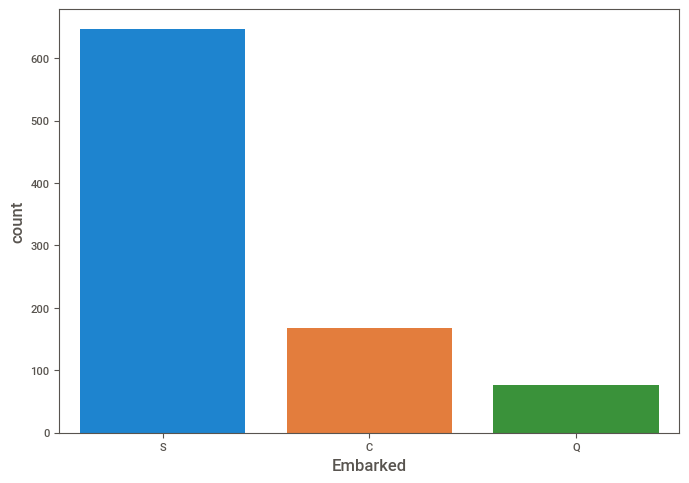

In [21]:
sns.countplot(data=df1, x="Embarked")

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

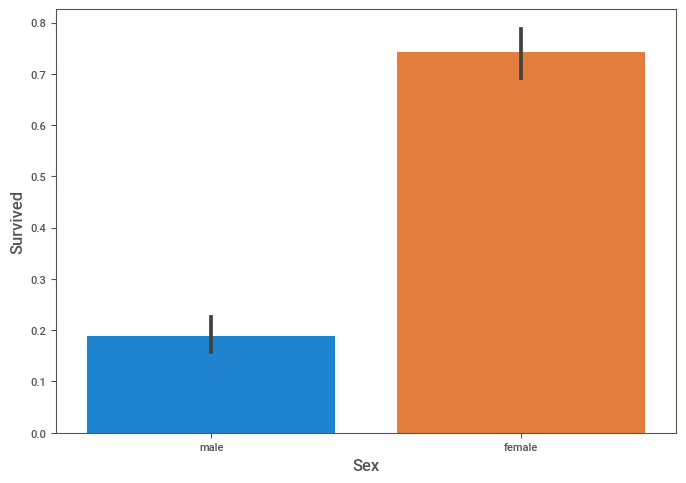

In [22]:
sns.barplot(data=df1, x="Sex", y="Survived")

In [23]:
#sns.barplot(data=df1,x="Sex",y="Survived", estimator=len)


In [24]:
len(df1[(df1["Sex"] == "male") & (df1["Survived"] == 1)])


109

In [25]:
len(df1[(df1["Sex"] == "female") & (df1["Survived"] == 1)])


233

<AxesSubplot: xlabel='Sex', ylabel='Age'>

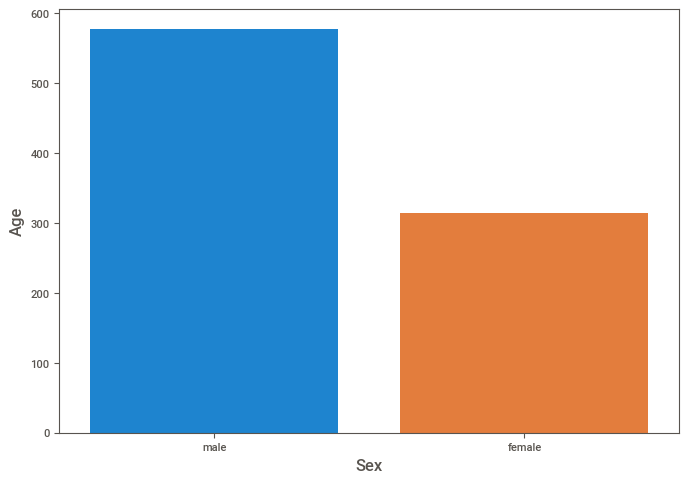

In [26]:
sns.barplot(data=df1,x="Sex",y="Age", estimator=len)


<AxesSubplot: xlabel='SibSp', ylabel='Survived'>

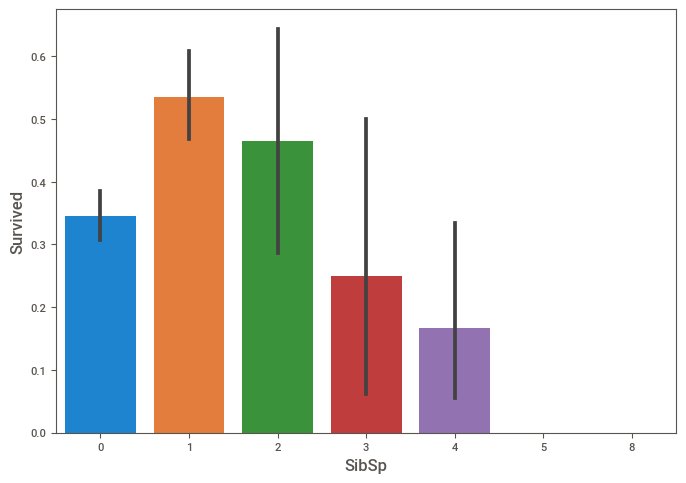

In [27]:
sns.barplot(data=df1,x="SibSp",y="Survived")


<AxesSubplot: xlabel='Parch', ylabel='Survived'>

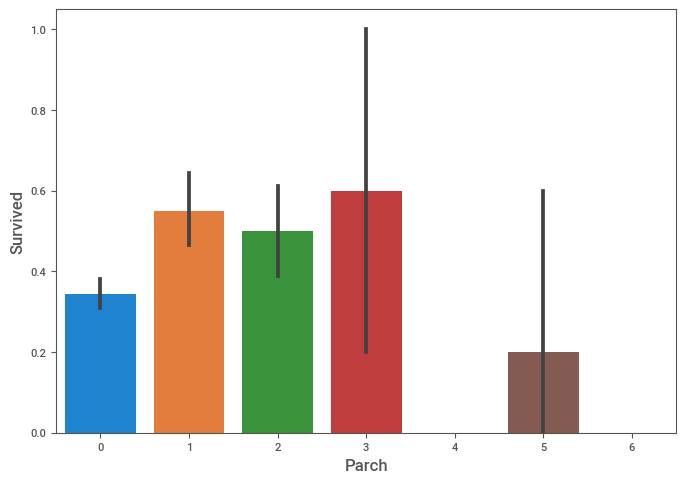

In [28]:
sns.barplot(data=df1,x="Parch",y="Survived")


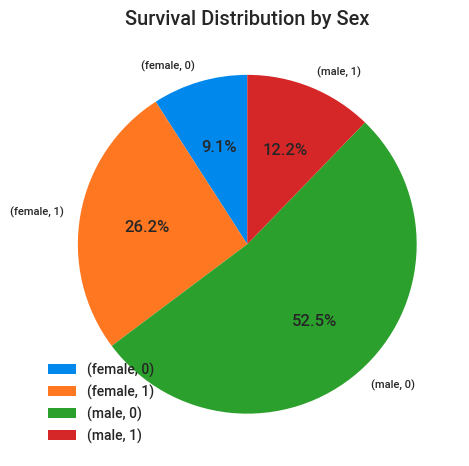

In [29]:
sex_survived = df1.groupby(['Sex', 'Survived']).size()
sex_survived.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, legend=True)
plt.title('Survival Distribution by Sex')
plt.ylabel('')  
plt.show()

# Machine Learning Part

In [30]:
label_encoder = LabelEncoder()
df1["Sex"] = label_encoder.fit_transform(df1["Sex"])
df1["Embarked"] = label_encoder.fit_transform(df1["Embarked"])

In [31]:
df1["Embarked"]

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(2)
memory usage: 69.7+ KB


In [33]:
X_train = df1.drop(["Survived","PassengerId","Ticket","Name"], axis=1)  
y_train = df1["Survived"] 


In [34]:
results = sm.OLS(y_train,X_train).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.488
Model:                            OLS   Adj. R-squared (uncentered):              0.484
Method:                 Least Squares   F-statistic:                              120.4
Date:                Thu, 16 Nov 2023   Prob (F-statistic):                   5.79e-124
Time:                        11:47:23   Log-Likelihood:                         -539.33
No. Observations:                 891   AIC:                                      1093.
Df Residuals:                     884   BIC:                                      1126.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
df2.drop("Cabin",axis=1,inplace=True)
df2["Age"].fillna(df1["Age"].mean(),inplace=True)
df2["Fare"].fillna(df1["Fare"].mean(),inplace=True)
df2["Embarked"].fillna(df1["Embarked"].mode()[0], inplace=True)
df2["Sex"] = label_encoder.fit_transform(df2["Sex"])
df2["Embarked"] = label_encoder.fit_transform(df2["Embarked"])

In [36]:
X_test = df2.drop(["PassengerId","Ticket","Name"], axis=1)  
y_test=df3["Survived"]
print(X_test.shape)
print(y_test.shape)
X_test.isna().sum()

(418, 7)
(418,)


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
results = sm.OLS(y_test,X_test).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Survived   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              666.8
Date:                Thu, 16 Nov 2023   Prob (F-statistic):                   6.19e-220
Time:                        11:47:23   Log-Likelihood:                          143.78
No. Observations:                 418   AIC:                                     -273.6
Df Residuals:                     411   BIC:                                     -245.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [38]:
best_svm = SVC()
best_svm.fit(X_train, y_train)

# Model Evaluation
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
#print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.66
Precision: 0.55
Recall: 0.28
F1-Score: 0.37


In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']  
}

grid_search = GridSearchCV(best_svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [40]:
best_params


{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [41]:


best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(best_svm, X_train, y_train, cv=kf, scoring='accuracy')

# Print the evaluation metrics
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.2f}")

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.93
Precision: 0.93
Recall: 0.88
F1-Score: 0.90
Cross-Validation Accuracy: 0.82


In [42]:
model=LogisticRegression()

In [43]:
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93
Confusion Matrix:
[[256  10]
 [ 19 133]]


<AxesSubplot: >

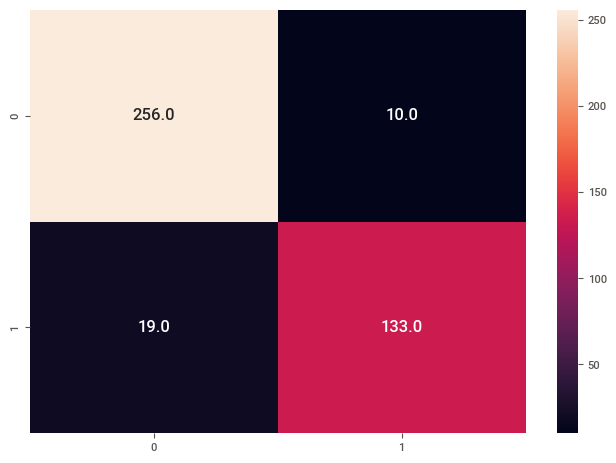

In [44]:
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix,annot=True,fmt="1.1f")

Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
Accuracy: 0.95
Precision: 0.92
Recall: 0.94
F1-Score: 0.93
Confusion Matrix:
[[253  13]
 [  9 143]]


<AxesSubplot: >

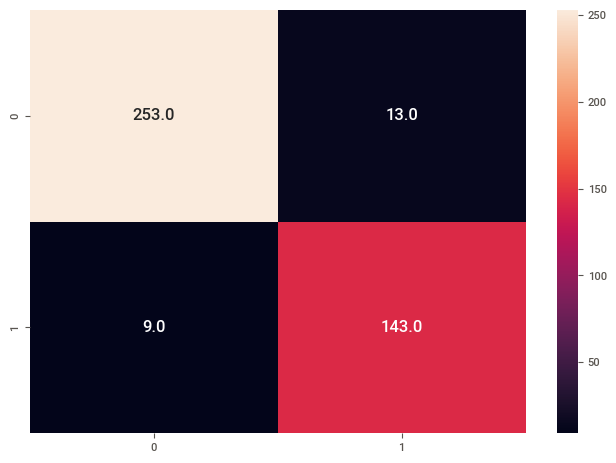

In [45]:
param_grid = {
    'C': [0.1, 1, 10],          
    'penalty': ['l1', 'l2'],  
    'max_iter': [100, 200, 300]  
}


grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

model=LogisticRegression(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix,annot=True,fmt="1.1f")

In [46]:
clf1 = setup(data=df1,target="Survived",session_id=123)


,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 11)"
4,Transformed data shape,"(891, 11)"
5,Transformed train set shape,"(623, 11)"
6,Transformed test set shape,"(268, 11)"
7,Numeric features,8
8,Categorical features,2
9,Preprocess,True


In [47]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8040,0.8692,0.6739,0.7842,0.7207,0.5724,0.5792,0.5020
ridge,Ridge Classifier,0.7703,0.0000,0.4982,0.8361,0.6199,0.4728,0.5067,0.0160
et,Extra Trees Classifier,0.6355,0.6799,0.0793,0.5614,0.1331,0.0723,0.1227,0.0440
nb,Naive Bayes,0.6260,0.8101,0.0380,0.3167,0.0678,0.0365,0.0651,0.0160
lda,Linear Discriminant Analysis,0.6260,0.5382,0.0348,0.0800,0.0485,0.0335,0.0389,0.0170
knn,K Neighbors Classifier,0.6259,0.5832,0.3607,0.5170,0.4191,0.1601,0.1668,0.2620
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0160
rf,Random Forest Classifier,0.6164,0.8224,0.0000,0.0000,0.0000,0.0000,0.0000,0.0550
qda,Quadratic Discriminant Analysis,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0180
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0170


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8483,0.7500,0.8182,0.7826,0.6580,0.6595
1,0.7937,0.7927,0.6250,0.7895,0.6977,0.5442,0.5528
2,0.8889,0.9583,0.8333,0.8696,0.8511,0.7625,0.7630
3,0.8226,0.8963,0.7391,0.7727,0.7556,0.6164,0.6168
4,0.7581,0.8355,0.5000,0.8000,0.6154,0.4523,0.4789
5,0.7581,0.8158,0.6250,0.7143,0.6667,0.4781,0.4807
6,0.8548,0.8871,0.7083,0.8947,0.7907,0.6819,0.6928
7,0.7581,0.8553,0.6667,0.6957,0.6809,0.4862,0.4865
8,0.7097,0.8520,0.4583,0.6875,0.5500,0.3481,0.3637


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8611,0.7917,0.8261,0.8085,0.6947,0.6951
1,0.8254,0.8248,0.7083,0.8095,0.7556,0.6207,0.6240
2,0.9365,0.9647,0.8750,0.9545,0.9130,0.8632,0.8652
3,0.8710,0.9019,0.7826,0.8571,0.8182,0.7185,0.7203
4,0.7581,0.8410,0.5417,0.7647,0.6341,0.4612,0.4765
5,0.7903,0.8257,0.7500,0.7200,0.7347,0.5615,0.5618
6,0.8065,0.8388,0.6250,0.8333,0.7143,0.5724,0.5860
7,0.8065,0.8772,0.7083,0.7727,0.7391,0.5857,0.5871
8,0.7581,0.8476,0.5833,0.7368,0.6512,0.4698,0.4773


Fitting 10 folds for each of 10 candidates, totalling 100 fits


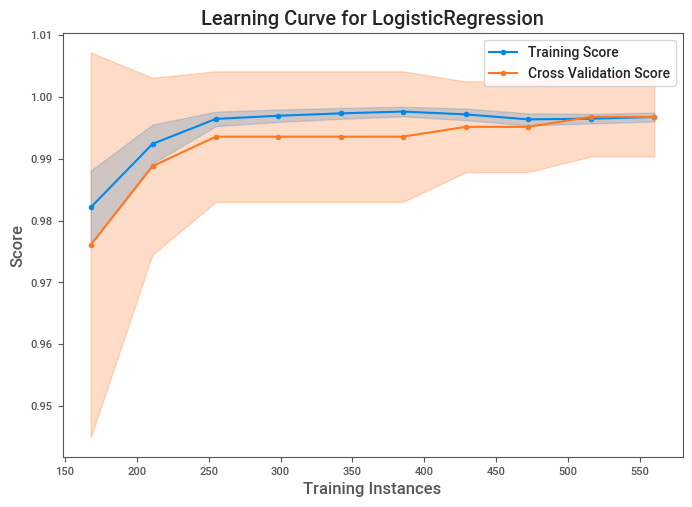

In [48]:
final_model = create_model(best_model)

tuned_model = tune_model(final_model)

plot_model(tuned_model, plot='learning')


In [49]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…